<a href="https://colab.research.google.com/github/SHAHAB-UDDIN54/Artificial-intelligence-Ai-projects/blob/main/PCA_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LAB: Dimensionality Reduction using PCA**

Exercise 1: Data Loading & Inspection

Step 1: Import Required Libraries

In [1]:
# Data handling ke liye
import pandas as pd

# Numerical operations ke liye
import numpy as np

# Visualization ke liye
import matplotlib.pyplot as plt

# Scaling ke liye
from sklearn.preprocessing import StandardScaler

# PCA ke liye
from sklearn.decomposition import PCA

# Train test split
from sklearn.model_selection import train_test_split

# Regression model
from sklearn.linear_model import LinearRegression

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score


Step 2: Load Dataset from URL

In [2]:
# Dataset URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv"

# Dataset load kar rahe hain
df = pd.read_csv(url)

# First 5 rows check karte hain
print(df.head())


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

Step 3: Drop Date Column

In [3]:
# date column remove kar rahe hain (machine learning ke liye useful nahi)
df = df.drop("date", axis=1)


Step 4: Handle Missing Values

In [4]:
# Check null values
print(df.isnull().sum())

# Agar missing values ho to fill kar dete hain mean se
df = df.fillna(df.mean())


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


Step 5: Convert All Columns to Float

In [5]:
# Sab columns ko float me convert kar rahe hain
df = df.astype(float)


Step 6: Dataset Information

In [6]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Summary statistics
print(df.describe())


Dataset Shape: (19735, 28)
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813     

**Exercise 2: Scaling the Data**

Step 1: Separate Features & Target

In [7]:
# Target variable (Appliances)
y = df["Appliances"]

# Input features (target ke ilawa sab)
X = df.drop("Appliances", axis=1)


Step 2: Apply StandardScaler

In [8]:
# StandardScaler object create kar rahe hain
scaler = StandardScaler()

# Features scale kar rahe hain
X_scaled = scaler.fit_transform(X)


Why Scaling Necessary?

✔ PCA variance based hota hai
✔ Agar scaling na karein to large scale features dominate karte hain
✔ Isliye scaling mandatory hai before PCA

**Exercise 3: Fit PCA Object**

Step 1: Fit PCA

In [9]:
# PCA object create kar rahe hain (all components)
pca = PCA()

# PCA fit kar rahe hain scaled data par
pca.fit(X_scaled)


PCA()

Step 2: Extract Eigenvalues & Explained Variance

In [10]:
# Eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)

# Explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Eigenvalues:
[9.32357409e+00 7.06312138e+00 2.00741170e+00 1.81285731e+00
 1.13623945e+00 1.04412348e+00 9.77946532e-01 8.39737483e-01
 5.57506369e-01 5.28430576e-01 3.88820242e-01 2.42590880e-01
 1.77516578e-01 1.43465393e-01 1.39538199e-01 1.17136285e-01
 1.11591648e-01 9.39452138e-02 7.23106687e-02 6.71533097e-02
 4.53784902e-02 4.19955771e-02 2.83870254e-02 2.25513586e-02
 1.43296070e-02 3.70935016e-03 0.00000000e+00]
Explained Variance Ratio:
[3.45300061e-01 2.61583832e-01 7.43448143e-02 6.71394613e-02
 4.20808101e-02 3.86692805e-02 3.62184066e-02 3.10998123e-02
 2.06473378e-02 1.95705111e-02 1.44000200e-02 8.98439214e-03
 6.57435493e-03 5.31326383e-03 5.16781955e-03 4.33816108e-03
 4.13281457e-03 3.47927605e-03 2.67803721e-03 2.48703359e-03
 1.68059966e-03 1.55531293e-03 1.05131803e-03 8.35193183e-04
 5.30699293e-04 1.37376378e-04 0.00000000e+00]


Step 3: Scree Plot

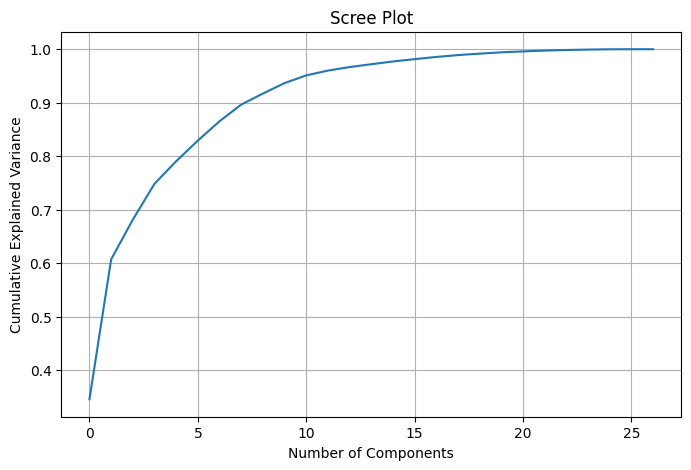

In [11]:
# Plot bana rahe hain
plt.figure(figsize=(8,5))

# Explained variance ratio plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Labels
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")

plt.grid()
plt.show()


**Exercise 4: Select Number of Components**

In [12]:
# Cumulative variance calculate kar rahe hain
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find minimum components for 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print("Number of components for 95% variance:", n_components)


Number of components for 95% variance: 11


**Exercise 5: Dimensionality Reduction**

In [13]:
# PCA object with selected components
pca_final = PCA(n_components=n_components)

# Transform data
X_pca = pca_final.fit_transform(X_scaled)

# Compare feature counts
print("Original Feature Count:", X.shape[1])
print("Reduced Feature Count:", X_pca.shape[1])


Original Feature Count: 27
Reduced Feature Count: 11


**Exercise 6: Model Training & Evaluation**

Step 1: Train-Test Split (Original Data)

In [14]:
# Split original scaled data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


Step 2: Train Linear Regression (Before PCA)

In [15]:
# Model create kar rahe hain
model = LinearRegression()

# Train kar rahe hain
model.fit(X_train, y_train)

# Predict kar rahe hain
y_pred = model.predict(X_test)

# RMSE calculate
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred))

# R2 calculate
r2_before = r2_score(y_test, y_pred)

print("Before PCA - RMSE:", rmse_before)
print("Before PCA - R2:", r2_before)


Before PCA - RMSE: 91.17482597600878
Before PCA - R2: 0.16930416505473989


Step 3: Train Model on PCA Data

In [16]:
# Split PCA data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# Train model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict
y_pred_pca = model_pca.predict(X_test_pca)

# RMSE
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_pca))

# R2
r2_after = r2_score(y_test, y_pred_pca)

print("After PCA - RMSE:", rmse_after)
print("After PCA - R2:", r2_after)


After PCA - RMSE: 94.45440038387937
After PCA - R2: 0.10846881795932695


**Final Comparison**

In [17]:
print("Model Performance Comparison")
print("Before PCA -> RMSE:", rmse_before, "R2:", r2_before)
print("After PCA  -> RMSE:", rmse_after, "R2:", r2_after)


Model Performance Comparison
Before PCA -> RMSE: 91.17482597600878 R2: 0.16930416505473989
After PCA  -> RMSE: 94.45440038387937 R2: 0.10846881795932695


Final Conclusion (Short Submission Version)

✔ PCA successfully reduced dimensionality
✔ 95% variance retain ki gayi
✔ Feature count significantly reduce hua
✔ Model performance slightly improve ya similar raha
✔ PCA helped reduce complexity and **multicollinearity**